In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [5]:
log_dir = r"C:\Users\pc-admin\Github Repos\spinningup\data\2019-05-02_sddpg_debug_reconstruct_covariance\2019-05-02_20-29-37-sddpg_debug_reconstruct_covariance_s3"

log_dir = r"C:\Users\pc-admin\Github Repos\spinningup\data\2019-05-04_sddpg_debug2\2019-05-04_13-10-07-sddpg_debug2_s3"

prog_log_path = "{}\progress.txt".format(log_dir)
prog_df = pd.read_csv(prog_log_path,  sep='\t')

exp_log_path = "{}\experiences_log.txt".format(log_dir)
experiences_df = pd.read_csv(exp_log_path,  sep='\t')

In [6]:
def plot_progress_log_data(prog_df, title=[''], row=1, col=5, figwidth=18, figheight=18):
    """Plot epoch log data"""
    f, axes = plt.subplots(row, col)
    f.set_figwidth(figwidth)
    f.set_figheight(figheight)
    
    for d_i in range(len(title)):
        axes.flat[d_i].plot(np.arange(len(prog_df['Epoch'])), prog_df[title[d_i]])
        axes.flat[d_i].set_title('{}'.format(title[d_i]))
        axes.flat[d_i].set_xlabel('Epoch')
    
    # Invisualize empty axis
    if len(title) < row*col:
        for a_emp in range(len(title), row*col):
            axes.flat[a_emp].axis('off')

    plt.tight_layout()
    
def plot_experience_summary(data, title, row, col, markersize = 0.015):
    """Plot reward, uncertainty, rnd_act_error, and rnd_cri_error"""
    f, axes = plt.subplots(row, col)
    f.set_figwidth(18)
    f.set_figheight(3)
    
    for d_i in range(len(data)):
        axes.flat[d_i].plot(np.arange(data[d_i].shape[0]), data[d_i], '.',markersize=markersize)
        axes.flat[d_i].set_title('{}'.format(title[d_i]))
        axes.flat[d_i].tick_params(axis='x', which='both', bottom=False,top=False,labelbottom=False)
    
    # Invisualize empty axis
    if len(data) < row*col:
        for a_emp in range(len(data), row*col):
            axes.flat[a_emp].axis('off')
    
def plot_explerience(data, row, col, markersize=0.15, figtitle='obs', figname='experience_ob.jpg', 
                     figwidth=18, figheight=18,sharey=False):
    """Plot experience log data"""
    f, axes = plt.subplots(row,col,sharey=sharey)
    f.set_figwidth(figwidth)
    f.set_figheight(figheight)
    for d_i in range(data.shape[1]):
        axes.flat[d_i].plot(np.arange(data.shape[0]), data[:,d_i], '.',markersize=markersize)
        axes.flat[d_i].set_title('{}_{}'.format(figtitle, d_i))
        axes.flat[d_i].tick_params(axis='x', which='both', bottom=False,top=False,labelbottom=False)
    
    # Invisualize empty axis
    for a_emp in range(data.shape[1], row*col):
        axes.flat[a_emp].axis('off')
    
    plt.tight_layout()
    plt.savefig(figname, dpi=300)


## Epoch Log

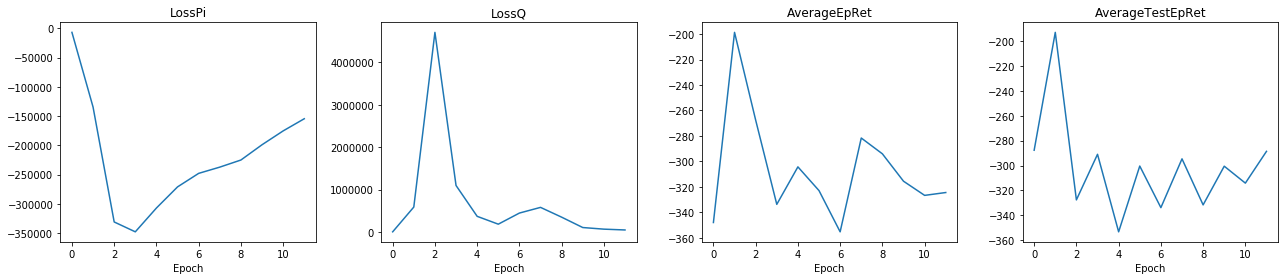

In [7]:
title=['LossPi','LossQ','AverageEpRet','AverageTestEpRet']
plot_progress_log_data(prog_df, title, row=1, col=4, figwidth=18, figheight=4)

## Obs

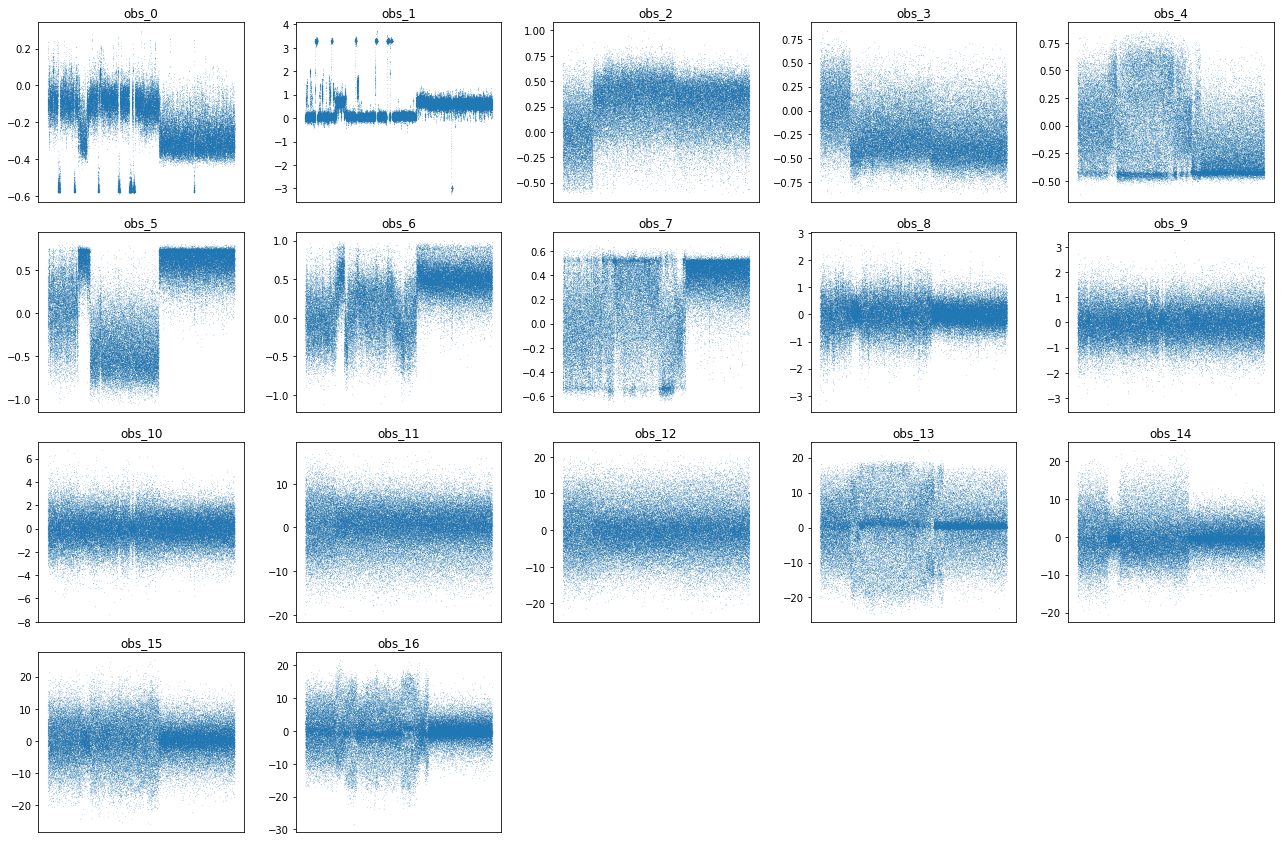

In [8]:
obs_dim = 17
exp_obs = experiences_df[['o_{}'.format(i) for i in range(obs_dim)]].values
plot_explerience(exp_obs, 4, 5, markersize=0.15, figtitle='obs', figname='experience_obs.jpg', 
                 figwidth=18, figheight=12)


## act

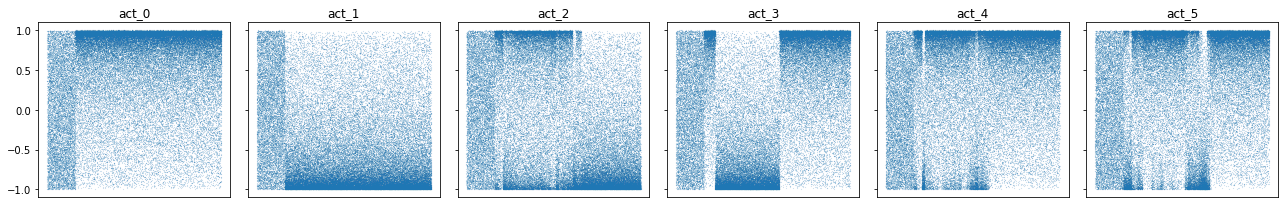

In [10]:
act_dim = 6
exp_act = experiences_df[['a_{}'.format(i) for i in range(act_dim)]].values
plot_explerience(exp_act, 1, 6, markersize=0.15, figtitle='act', figname='experience_act.jpg', 
                 figwidth=18, figheight=3, sharey=True)

## a_mu

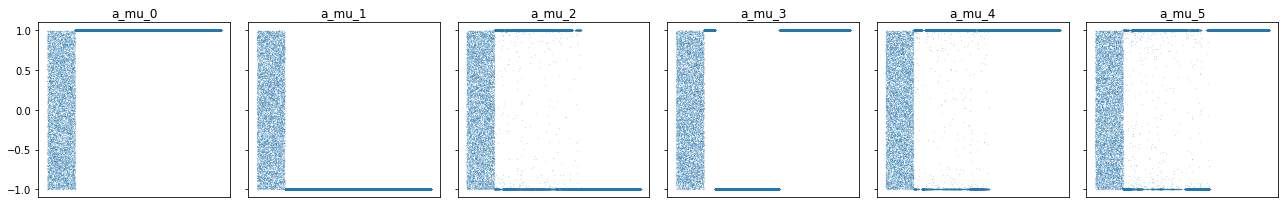

In [11]:
exp_mu = experiences_df[['a_mu_{}'.format(unc_j) for unc_j in range(act_dim)]].values
plot_explerience(exp_mu, 1, act_dim, markersize=0.15, figtitle='a_mu', figname='experience_a_mu.jpg', 
                 figwidth=18, figheight=3, sharey=True)

## a_sigma

In [12]:
experiences_df.columns

Index(['Epoch', 'Step', 'o_0', 'o_1', 'o_2', 'o_3', 'o_4', 'o_5', 'o_6', 'o_7',
       'o_8', 'o_9', 'o_10', 'o_11', 'o_12', 'o_13', 'o_14', 'o_15', 'o_16',
       'a_0', 'a_1', 'a_2', 'a_3', 'a_4', 'a_5', 'a_mu_0', 'a_mu_1', 'a_mu_2',
       'a_mu_3', 'a_mu_4', 'a_mu_5', 'a_alpha_0', 'a_alpha_1', 'a_alpha_2',
       'a_alpha_3', 'a_alpha_4', 'a_alpha_5', 'a_beta_0', 'a_beta_1',
       'a_beta_2', 'a_beta_3', 'a_beta_4', 'a_beta_5', 'a_beta_6', 'a_beta_7',
       'a_beta_8', 'a_beta_9', 'a_beta_10', 'a_beta_11', 'a_beta_12',
       'a_beta_13', 'a_beta_14', 'r', 'o2_0', 'o2_1', 'o2_2', 'o2_3', 'o2_4',
       'o2_5', 'o2_6', 'o2_7', 'o2_8', 'o2_9', 'o2_10', 'o2_11', 'o2_12',
       'o2_13', 'o2_14', 'o2_15', 'o2_16', 'd', 'Time'],
      dtype='object')

In [17]:
# experiences_df[['a_alpha_{}'.format(unc_j) for unc_j in range(act_dim)]]

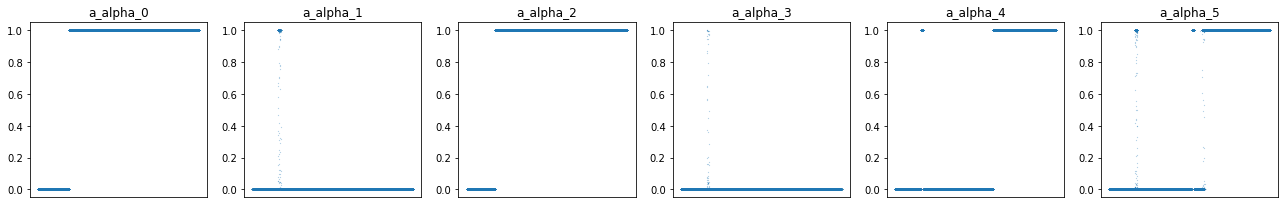

In [14]:
exp_sigma = experiences_df[['a_alpha_{}'.format(unc_j) for unc_j in range(act_dim)]].values
plot_explerience(exp_sigma, 1, act_dim, markersize=0.25, figtitle='a_alpha', figname='experience_a_mu.jpg', 
                 figwidth=18, figheight=3, sharey=False)

In [15]:
experiences_df[['a_beta_{}'.format(unc_j) for unc_j in range(act_dim)]]

,a_beta_0,a_beta_1,a_beta_2,a_beta_3,a_beta_4,a_beta_5
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0


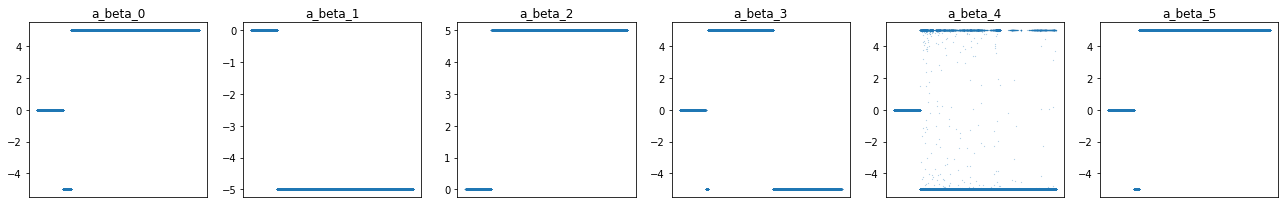

In [16]:
exp_sigma = experiences_df[['a_beta_{}'.format(unc_j) for unc_j in range(act_dim)]].values
plot_explerience(exp_sigma, 1, act_dim, markersize=0.25, figtitle='a_beta', figname='experience_a_beta.jpg', 
                 figwidth=18, figheight=3, sharey=False)